In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# plot inside the notebook rather than in a new window
%matplotlib inline

In [2]:
dataset = pd.read_csv('./data/pima-diabetes.csv')

In [3]:
print(f'table shape: {dataset.shape}')
dataset.head(10)

table shape: (768, 10)


,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,True
1,1,85,66,29,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,0,23.3,0.672,32,0.0000,True
3,1,89,66,23,94,28.1,0.167,21,0.9062,False
4,0,137,40,35,168,43.1,2.288,33,1.3790,True
5,5,116,74,0,0,25.6,0.201,30,0.0000,False
6,3,78,50,32,88,31.0,0.248,26,1.2608,True
7,10,115,0,0,0,35.3,0.134,29,0.0000,False
8,2,197,70,45,543,30.5,0.158,53,1.7730,True
9,8,125,96,0,0,0.0,0.232,54,0.0000,True


In [4]:
# Data cleaning

null values present: False


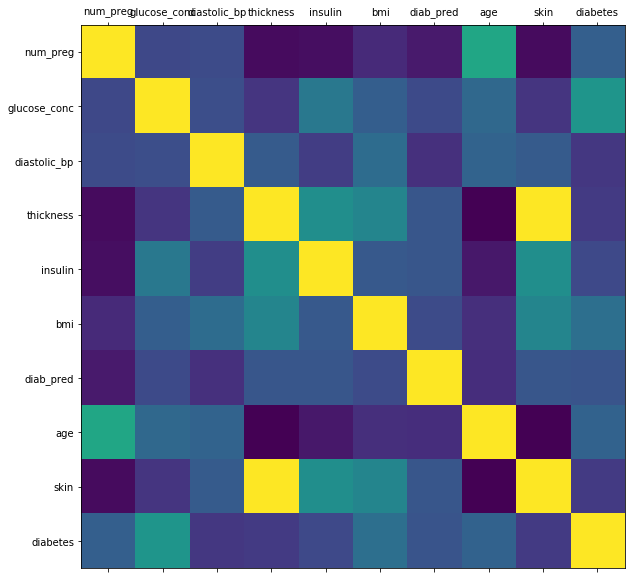

In [5]:
def plot_correlation(dataset):
    """
    Plots a correlation graph for a dataset to help removing
    duplicated columns
    """
    _, axis = plt.subplots(
        figsize=(10,10)
    )
    
    corr_tab = dataset.corr()
    
    axis.matshow(corr_tab)
    plt.xticks(range(len(corr_tab.columns)), corr_tab.columns)
    plt.yticks(range(len(corr_tab.index)), corr_tab.index)
    
    
plot_correlation(dataset)
print(f'null values present: {dataset.isnull().values.any()}')


In [6]:
# remove duplicated column
del dataset['skin']

In [7]:
# Data sanitization

In [8]:
# force bool to int
dataset['diabetes'] = dataset['diabetes'].map(lambda x: int(x))

In [9]:
dataset.head(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [10]:
# evaluate class for meaningful number of datapoints
diabetic_samples = dataset.loc[dataset['diabetes'] == True]
print(f'diabetes incidence: abs {len(diabetic_samples)}, rel {len(diabetic_samples)/len(dataset.index):.4f}')

diabetes incidence: abs 268, rel 0.3490


In [11]:
# Data preparation

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Imputer

In [13]:
dataset_classes = ['diabetes']
dataset_features = [col for col in dataset.columns if col not in dataset_classes]

X = dataset[dataset_features].values
y = dataset[dataset_classes].values

In [14]:
# impute missing data
for feature in dataset_features:
    print(f'{feature}: {len(dataset[feature][lambda x: x == 0])}')
    
imputer_instance = Imputer(
    missing_values=0,
    strategy='mean',
    axis=0
)
# TODO: this will overwrite the number of pregnancies too!
X_imputed = imputer_instance.fit_transform(X)

num_preg: 111
glucose_conc: 5
diastolic_bp: 35
thickness: 227
insulin: 374
bmi: 11
diab_pred: 0
age: 0


In [15]:
# split test/training, default to .25/.75
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, random_state=123)

In [16]:
# Fitting with naive Bayes

In [17]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

In [18]:
fitter_instance = GaussianNB()

In [19]:
fitter_instance.fit(X_train, y_train.ravel())

GaussianNB(priors=None)

In [20]:
# prediction on training data
train_prediction = fitter_instance.predict(X_train)
metrics.accuracy_score(y_train, train_prediction)

0.75347222222222221

In [21]:
# prediction on test data
test_prediction = fitter_instance.predict(X_test)
metrics.accuracy_score(y_test, test_prediction)

0.765625

             precision    recall  f1-score   support

          0       0.80      0.83      0.81       119
          1       0.71      0.66      0.68        73

avg / total       0.76      0.77      0.76       192



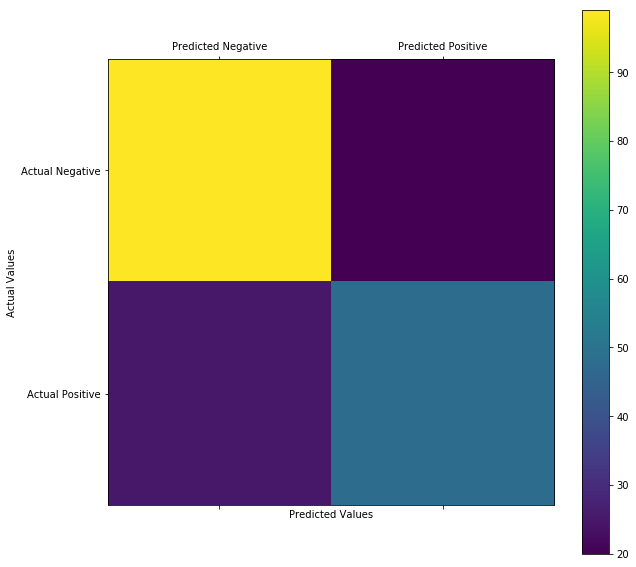

In [22]:
# general stats
def plot_confusion_matrix(y, prediction):
    """
    Plots a 2x2 matrix showing the TN/FN/TP/FP ratios
    """
    _, axis = plt.subplots(
        figsize=(10,10)
    )
    
    conf_tab = metrics.confusion_matrix(y, prediction)
    plot = axis.matshow(conf_tab)
    
    plt.xlabel('Predicted Values')
    plt.ylabel('Actual Values')
    plt.colorbar(plot)
    plt.xticks([0,1], ['Predicted Negative', 'Predicted Positive'])
    plt.yticks([0,1], ['Actual Negative', 'Actual Positive'])
    
print(metrics.classification_report(y_test, test_prediction))
plot_confusion_matrix(y_test, test_prediction)

In [23]:
# Random Forest fitting and reporting

In [24]:
from sklearn.ensemble import RandomForestClassifier

In [25]:
rf_fitter_instance = RandomForestClassifier(random_state=123)

In [26]:
rf_fitter_instance.fit(X_train, y_train.ravel())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=123, verbose=0, warm_start=False)

In [27]:
# prediction on training data
train_prediction = rf_fitter_instance.predict(X_train)
metrics.accuracy_score(y_train, train_prediction)

0.97222222222222221

In [28]:
# prediction on test data
test_prediction = rf_fitter_instance.predict(X_test)
metrics.accuracy_score(y_test, test_prediction)

0.79166666666666663

             precision    recall  f1-score   support

          0       0.79      0.90      0.84       119
          1       0.79      0.62      0.69        73

avg / total       0.79      0.79      0.79       192



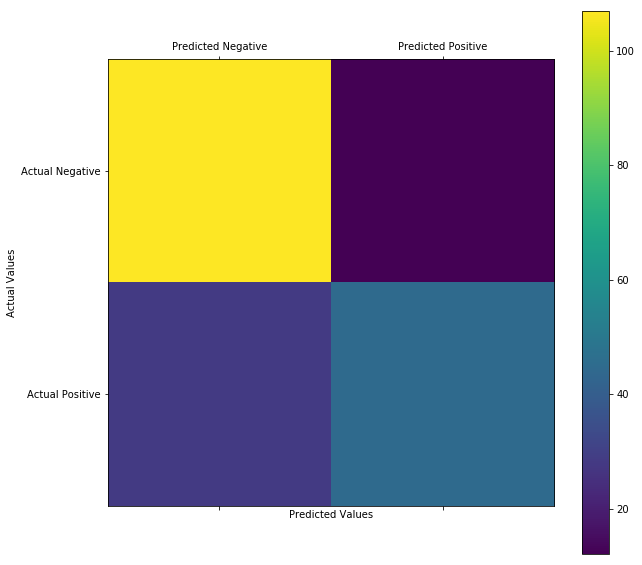

In [29]:
print(metrics.classification_report(y_test, test_prediction))
plot_confusion_matrix(y_test, test_prediction)

In [30]:
# Logistic Regression fitting and reporting

In [31]:
from sklearn.linear_model import LogisticRegression

In [32]:
lr_fitter_instance = LogisticRegression(random_state=123, C=1.8)

In [33]:
lr_fitter_instance.fit(X_train, y_train.ravel())

LogisticRegression(C=1.8, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=123, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [34]:
# prediction on training data
train_prediction = lr_fitter_instance.predict(X_train)
metrics.accuracy_score(y_train, train_prediction)

0.76909722222222221

In [35]:
# prediction on test data
test_prediction = lr_fitter_instance.predict(X_test)
metrics.accuracy_score(y_test, test_prediction)

0.80208333333333337

             precision    recall  f1-score   support

          0       0.80      0.90      0.85       119
          1       0.80      0.64      0.71        73

avg / total       0.80      0.80      0.80       192



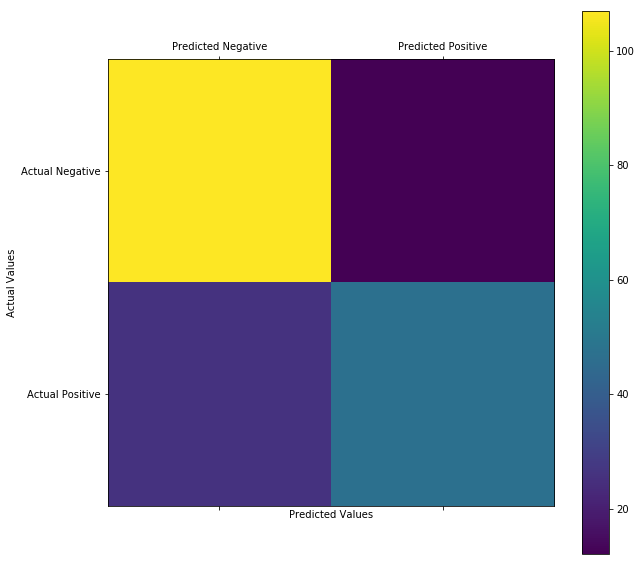

In [36]:
print(metrics.classification_report(y_test, test_prediction))
plot_confusion_matrix(y_test, test_prediction)

In [37]:
# C values tweaking

In [38]:
import numpy as np

In [39]:
def log_fit_and_predict(X_train, y_train, X_pred, C=0.7, class_weight=None):
    fitter = LogisticRegression(random_state=123, C=C, class_weight=class_weight)
    fitter.fit(X_train, y_train.ravel())
    return fitter.predict(X_pred)
    
C_recall_list = [
    (C, metrics.recall_score(
        y_test, 
        log_fit_and_predict(X_train, y_train, X_test, C)
    ))
    for C
    in np.arange(0.1, 5, 0.1)
]

C value: 1.40, recall: 0.6438
C value: 1.50, recall: 0.6438
C value: 1.60, recall: 0.6438
C value: 1.70, recall: 0.6438
C value: 1.80, recall: 0.6438
C value: 1.90, recall: 0.6438
C value: 2.00, recall: 0.6438
C value: 2.10, recall: 0.6438
C value: 2.20, recall: 0.6301
C value: 2.30, recall: 0.6301
C value: 2.40, recall: 0.6301
C value: 2.50, recall: 0.6301
C value: 2.60, recall: 0.6301
C value: 2.70, recall: 0.6301
C value: 2.80, recall: 0.6301
C value: 2.90, recall: 0.6301
C value: 3.00, recall: 0.6301
C value: 3.10, recall: 0.6301
C value: 3.20, recall: 0.6301
C value: 3.30, recall: 0.6301
C value: 3.40, recall: 0.6301
C value: 3.50, recall: 0.6301
C value: 3.60, recall: 0.6301
C value: 3.70, recall: 0.6301
C value: 3.80, recall: 0.6301
C value: 3.90, recall: 0.6301
C value: 4.00, recall: 0.6301
C value: 4.10, recall: 0.6301
C value: 4.20, recall: 0.6301
C value: 4.30, recall: 0.6301
C value: 4.40, recall: 0.6301
C value: 4.50, recall: 0.6301
C value: 4.60, recall: 0.6301
C value: 4

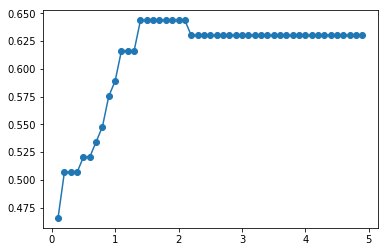

In [40]:
for tup in sorted(C_recall_list, key=lambda x: x[1], reverse=True):
    print(f'C value: {tup[0]:.2f}, recall: {tup[1]:.4f}')

plt.plot(list(zip(*C_recall_list))[0], list(zip(*C_recall_list))[1], 'o-')

In [41]:
# Class imbalance adjustment

In [42]:
C_recall_list = [
    (C, metrics.recall_score(
        y_test, 
        log_fit_and_predict(X_train, y_train, X_test, C, 'balanced')
    ))
    for C
    in np.arange(0.1, 5, 0.1)
]

C value: 0.80, recall: 0.8493
C value: 0.40, recall: 0.8356
C value: 0.50, recall: 0.8356
C value: 0.60, recall: 0.8356
C value: 0.70, recall: 0.8356
C value: 0.90, recall: 0.8356
C value: 1.00, recall: 0.8356
C value: 0.30, recall: 0.8219
C value: 1.10, recall: 0.8219
C value: 1.20, recall: 0.8219
C value: 1.30, recall: 0.8219
C value: 2.90, recall: 0.8219
C value: 3.00, recall: 0.8219
C value: 3.10, recall: 0.8219
C value: 3.20, recall: 0.8219
C value: 3.30, recall: 0.8219
C value: 3.40, recall: 0.8219
C value: 3.50, recall: 0.8219
C value: 3.60, recall: 0.8219
C value: 0.20, recall: 0.8082
C value: 1.40, recall: 0.8082
C value: 1.50, recall: 0.8082
C value: 1.60, recall: 0.8082
C value: 1.70, recall: 0.8082
C value: 1.80, recall: 0.8082
C value: 1.90, recall: 0.8082
C value: 2.00, recall: 0.8082
C value: 2.10, recall: 0.8082
C value: 2.20, recall: 0.8082
C value: 2.30, recall: 0.8082
C value: 2.40, recall: 0.8082
C value: 2.50, recall: 0.8082
C value: 2.60, recall: 0.8082
C value: 2

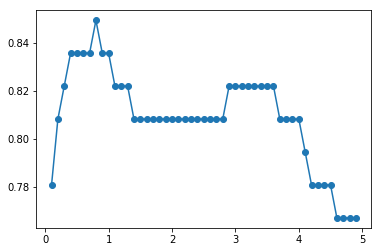

In [43]:
sorted_recall_list = sorted(C_recall_list, key=lambda x: x[1], reverse=True)
for tup in sorted_recall_list:
    print(f'C value: {tup[0]:.2f}, recall: {tup[1]:.4f}')

plt.plot(list(zip(*C_recall_list))[0], list(zip(*C_recall_list))[1], 'o-')

In [44]:
# Full report with tuned C value and balanced weights

In [45]:
test_prediction = log_fit_and_predict(
    X_train,
    y_train,
    X_test,
    sorted_recall_list[0][0],
    class_weight='balanced'
)
metrics.recall_score(y_test, test_prediction)

0.84931506849315064

0.796875
             precision    recall  f1-score   support

          0       0.89      0.76      0.82       119
          1       0.69      0.85      0.76        73

avg / total       0.81      0.80      0.80       192



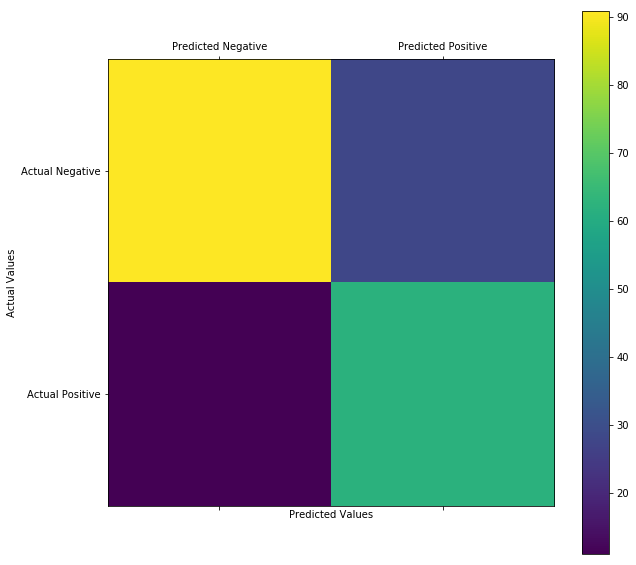

In [46]:
print(metrics.accuracy_score(y_test, test_prediction))
print(metrics.classification_report(y_test, test_prediction))
plot_confusion_matrix(y_test, test_prediction)
# precision down the drain.

In [47]:
# Cross validation (k-fold)

In [48]:
from sklearn.linear_model import LogisticRegressionCV

In [71]:
lrcv_fitter = LogisticRegressionCV(
    n_jobs=-1,
    random_state=123,
    Cs=20, # chose 3 regularization values from a log scale?
    cv=20, # number of folds to use
    refit=False, # average the best scores params
    class_weight='balanced'
)

In [72]:
lrcv_fitter.fit(X_train, y_train.ravel())
test_prediction = lrcv_fitter.predict(X_test)

[[94 25]
 [19 54]]
             precision    recall  f1-score   support

          0       0.83      0.79      0.81       119
          1       0.68      0.74      0.71        73

avg / total       0.78      0.77      0.77       192



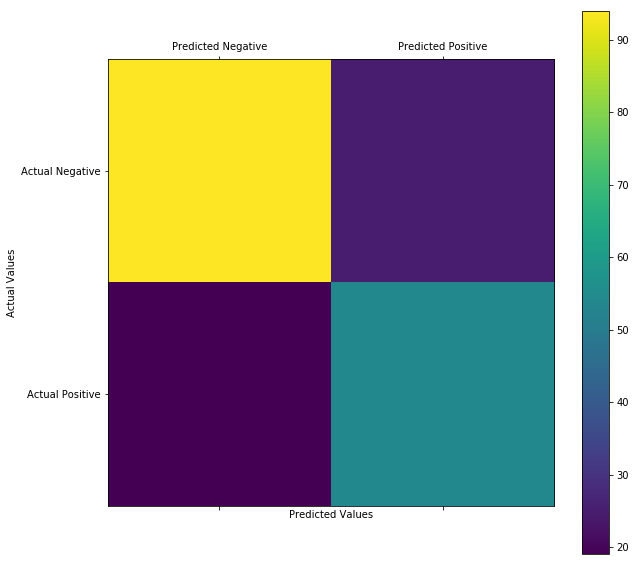

In [73]:
print(metrics.confusion_matrix(y_test, test_prediction))
print(metrics.classification_report(y_test, test_prediction))
plot_confusion_matrix(y_test, test_prediction)
